## 6. Gradient Boosting Homework  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
%matplotlib inline

In [2]:
def mse(y, y_pred):
    return np.sum((y - y_pred)**2) / len(y)

In [3]:
X, y = load_diabetes(return_X_y=True)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

### Task 1

Для реализованной модели градиентного бустинга построить графики зависимости ошибки от количества деревьев в ансамбле и от
максимальной глубины деревьев. Сделать выводы о зависимости ошибки от этих параметров.

In [5]:
class GradientBoostingRegressor:
    def __init__(self, *args, n_trees=100, eta=0.01, **kwargs):
        self.args = args
        self.kwargs = kwargs
        
        self.n_trees = n_trees
        self.eta = eta
        self.alg = None
        
        self.train_errors = None
        self.test_errors = None
        
        
    def fit(self, X_train, y_train, X_test, y_test):
        X_train = pd.DataFrame(X_train)
        y_train = pd.Series(y_train)
        
        self.forest = []

        self.train_errors = []
        self.test_errors = []

        for i in range(self.n_trees):
            alg = DecisionTreeRegressor(*self.args, **self.kwargs)

            if len(self.forest) == 0:
                alg.fit(X_train, y_train)

            else:
                prediction = self.predict(X_train)
                alg.fit(X_train, self.bias(y_train, prediction))
                
            self.forest.append(alg)
            
            self.train_errors.append(mse(y_train, self.predict(X_train)))
            self.test_errors.append(mse(y_test, self.predict(X_test)))
    
    def predict(self, X):
        return np.sum([self.eta * alg.predict(X) for alg in self.forest], axis=0)
   
    @staticmethod
    def bias(y, z):
        return (y - z)

In [9]:
max_depths = [i for i in range(1, 10)]
trees_count = [1, 3, 10, 50, 100, 300]

md_errors = []
for md in max_depths:
    nt = 300
    model = GradientBoostingRegressor(n_trees=nt, max_depth=md, random_state=0)
    model.fit(X_train, y_train, X_test, y_test)
    md_errors.append(model.test_errors)
    print(f'max_depth: {md} n_trees: {nt} test_train_diff: {model.test_errors[-1] - model.train_errors[-1]}')


# best = np.inf
nt_errors = []
for nt in trees_count:
    md = 2
    model = GradientBoostingRegressor(n_trees=nt, max_depth=md, random_state=0)
    model.fit(X_train, y_train, X_test, y_test)
    nt_errors.append(model.test_errors)
    print(f'max_depth: {md} n_trees: {nt} test_train_diff: {model.test_errors[-1] - model.train_errors[-1]}')
#     if model.test_errors[-1] < best:
#         best = model.test_errors[-1]

max_depth: 1 n_trees: 300 test_train_diff: 336.7885055322736
max_depth: 2 n_trees: 300 test_train_diff: 1057.0141097058427
max_depth: 3 n_trees: 300 test_train_diff: 1689.8216740149408
max_depth: 4 n_trees: 300 test_train_diff: 2315.848881323508
max_depth: 5 n_trees: 300 test_train_diff: 3015.44945541843
max_depth: 6 n_trees: 300 test_train_diff: 3486.0111519392694
max_depth: 7 n_trees: 300 test_train_diff: 3357.0446195987192
max_depth: 8 n_trees: 300 test_train_diff: 3601.1615097307977
max_depth: 9 n_trees: 300 test_train_diff: 3458.2212985857177
max_depth: 2 n_trees: 1 test_train_diff: -609.4441478333611
max_depth: 2 n_trees: 3 test_train_diff: -586.5219748103773
max_depth: 2 n_trees: 10 test_train_diff: -481.8869094205402
max_depth: 2 n_trees: 50 test_train_diff: -28.48518087989578
max_depth: 2 n_trees: 100 test_train_diff: 250.58236172091074
max_depth: 2 n_trees: 300 test_train_diff: 1057.0141097058427


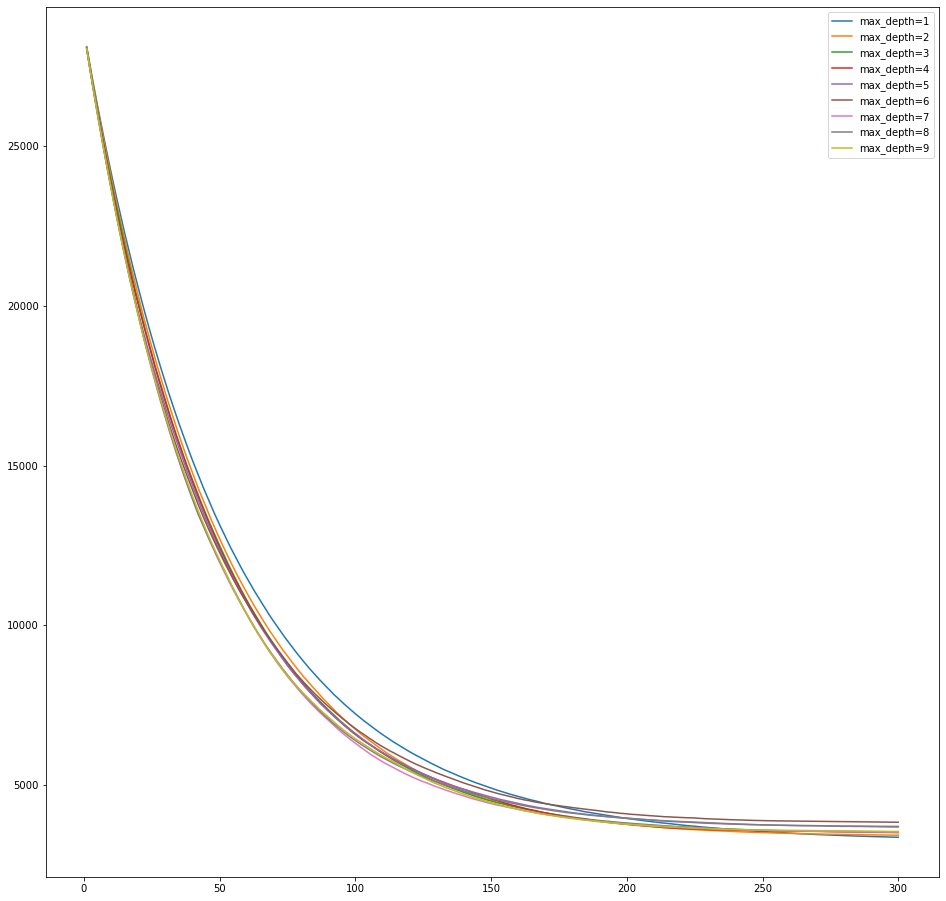

In [11]:
fig, ax = plt.subplots(figsize=(16,16))
for i, e in enumerate(md_errors, 1):
    a = np.arange(1, len(e) + 1)
    ax.plot(a, np.array(e), label=f'max_depth={i}')
plt.legend()
plt.show()

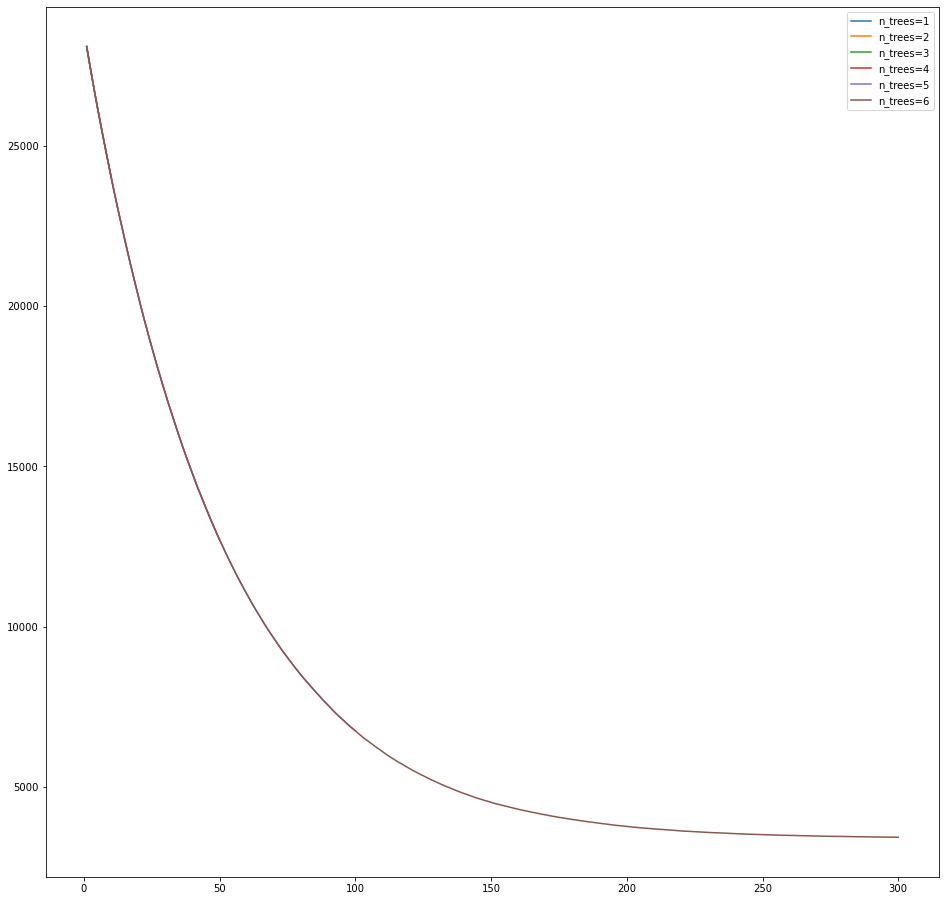

In [17]:
fig, ax = plt.subplots(figsize=(16,16))
for i, e in enumerate(nt_errors, 1):
    a = np.arange(1, len(e) + 1)
    ax.plot(a, np.array(e), label=f'n_trees={i}')
plt.legend()
plt.show()